In [1]:
import os.path as op
import numpy as np

import mne
from mne.datasets import eegbci
from mne.datasets import fetch_fsaverage


fs_dir = "/Users/martin/mne_data/MNE-fsaverage-data/"
subjects_dir = op.dirname(fs_dir)

# The files live in:
subject = 'fsaverage'
trans = 'fsaverage'  # MNE has a built-in fsaverage transformation
src = op.join(fs_dir,'fsaverage', 'bem', 'fsaverage-ico-5-src.fif')
bem = op.join(fs_dir,'fsaverage', 'bem', 'fsaverage-5120-5120-5120-bem-sol.fif')

Using surface: /Users/martin/mne_data/MNE-fsaverage-data/fsaverage/bem/inner_skull.surf
Using surface: /Users/martin/mne_data/MNE-fsaverage-data/fsaverage/bem/outer_skull.surf
Using surface: /Users/martin/mne_data/MNE-fsaverage-data/fsaverage/bem/outer_skin.surf
    Reading a source space...
    [done]
    Reading a source space...
    [done]
    2 source spaces read


/Users/martin/anaconda3/envs/mne/lib/python3.10/site-packages/mne/viz/utils.py:120: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


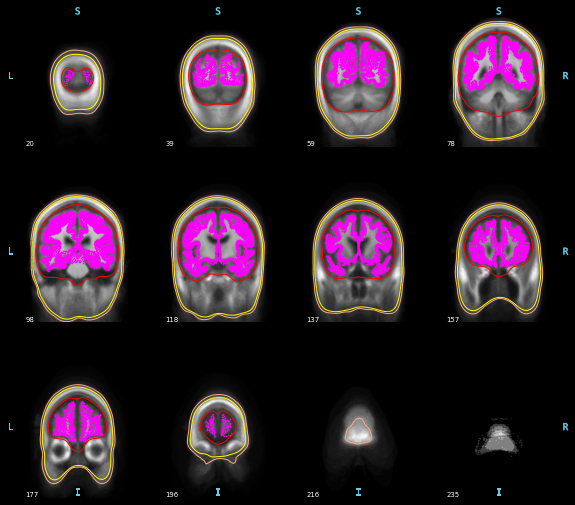

In [2]:
mne.viz.plot_bem(src=src, subject=subject);

In [2]:
kind = "standard_1020"
montage = mne.channels.make_standard_montage(kind, head_size='auto')
info = mne.create_info(ch_names=montage.ch_names, sfreq=256, ch_types='eeg')
info.set_montage(montage)

forward_solution = mne.make_forward_solution(info, trans=trans, src=src, bem=bem,
                                meg=False, eeg=True, mindist=0.0)

Source space          : /Users/martin/mne_data/MNE-fsaverage-data/fsaverage/bem/fsaverage-ico-5-src.fif
MRI -> head transform : /Users/martin/anaconda3/envs/mne/lib/python3.10/site-packages/mne/data/fsaverage/fsaverage-trans.fif
Measurement data      : instance of Info
Conductor model   : /Users/martin/mne_data/MNE-fsaverage-data/fsaverage/bem/fsaverage-5120-5120-5120-bem-sol.fif
Accurate field computations
Do computations in head coordinates
Free source orientations

Reading /Users/martin/mne_data/MNE-fsaverage-data/fsaverage/bem/fsaverage-ico-5-src.fif...
Read 2 source spaces a total of 20484 active source locations

Coordinate transformation: MRI (surface RAS) -> head
     0.999994  0.003552  0.000202      -1.76 mm
    -0.003558  0.998389  0.056626      31.09 mm
    -0.000001 -0.056626  0.998395      39.60 mm
     0.000000  0.000000  0.000000       1.00

Read  94 EEG channels from info
Head coordinate coil definitions created.
Source spaces are now in head coordinates.

Setting up t

In [3]:
fig = mne.viz.create_3d_figure(size=(600, 400))

# Plot the cortex
mne.viz.plot_alignment(
    subject=subject, subjects_dir=subjects_dir, trans=trans,
    surfaces='white', coord_frame='head', fig=fig)

# Show the three dipoles defined at each location in the source space
mne.viz.plot_alignment(
    subject=subject, subjects_dir=subjects_dir, trans=trans, fwd=forward_solution,
    surfaces='white', coord_frame='head', fig=fig)

mne.viz.set_3d_view(figure=fig, azimuth=180, distance=0.25)

Using pyvistaqt 3d backend.



In [5]:
mne.convert_forward_solution(forward_solution, surf_ori=True, copy=False)

    No patch info available. The standard source space normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]


Good channels,94 EEG
Bad channels,None
Source space,Surface with 20484 vertices
Source orientation,Free


In [6]:
fig = mne.viz.create_3d_figure(size=(600, 400))

# Plot the cortex
mne.viz.plot_alignment(
    subject=subject, subjects_dir=subjects_dir, trans=trans,
    surfaces='white', coord_frame='head', fig=fig)

# Show the three dipoles defined at each location in the source space
mne.viz.plot_alignment(
    subject=subject, subjects_dir=subjects_dir, trans=trans, fwd=forward_solution,
    surfaces='white', coord_frame='head', fig=fig)

mne.viz.set_3d_view(figure=fig, azimuth=180, distance=0.25)